<a href="https://colab.research.google.com/github/vickylee22/Challenge-11/blob/main/analyze_model_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Student Activity: Forecasting Part II

This program is **part 2** of a two-part student activity and begins with the original code from **part 1**. 

**Part 2** begins after the original code is run, in order to analyze this forecasted data in more detail.

## Part 1: Reading in and Preparing the Data

### Import the required libraries and dependencies

In [22]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
from fbprophet import Prophet
import hvplot.pandas
import datetime as dt
%matplotlib inline

In [23]:
! pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Read in, prepare, and visualize the data

In [24]:
# Read csv file as DataFrame, with the first column as row index
data_path = Path("bitcoin_hourly.csv")
df = pd.read_csv(data_path, infer_datetime_format=True, parse_dates=True)

# Drop columns that won't be used
df = df.drop('volume', axis=1)

# Preview the dataset
df

,date,close
0,2017-08-17 05:00:00.000,4315.32
1,2017-08-17 06:00:00.000,4324.35
2,2017-08-17 07:00:00.000,4349.99
3,2017-08-17 08:00:00.000,4360.69
4,2017-08-17 09:00:00.000,4444.00
...,...,...
30743,2021-02-12 01:00:00.000,48477.50
30744,2021-02-12 02:00:00.000,47935.66
30745,2021-02-12 03:00:00.000,47587.31
30746,2021-02-12 04:00:00.000,47271.55


In [25]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df.columns = ['ds', 'y']

# View dataframe shape, and the first and last five rows of the  DataFrame
display(df.shape)
display(df.head())
display(df.tail())

(30748, 2)

,ds,y
0,2017-08-17 05:00:00.000,4315.32
1,2017-08-17 06:00:00.000,4324.35
2,2017-08-17 07:00:00.000,4349.99
3,2017-08-17 08:00:00.000,4360.69
4,2017-08-17 09:00:00.000,4444.00


,ds,y
30743,2021-02-12 01:00:00.000,48477.50
30744,2021-02-12 02:00:00.000,47935.66
30745,2021-02-12 03:00:00.000,47587.31
30746,2021-02-12 04:00:00.000,47271.55
30747,2021-02-12 05:00:00.000,47398.79


In [26]:
# sort the DataFrame by ds in ascending order, so to arrange the data chronologically from past to present
df = df.sort_values(by=['ds'])

# Use hvPlot to visually inspect the price data
df.hvplot(x='ds', y ='y')

:Curve   [ds]   (y)

## Create a Prophet Model and Make Predictions

### Fitting the Model

In [27]:
# Call the Prophet function, store as an object
model = Prophet()
model

In [28]:
# Fit the time-series model.
model.fit(df)

### Making Model Predictions

In [29]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 1000 hours (approx 40 days, or 1000/24 = 40)
future_trends = model.make_future_dataframe(periods=1000, freq='H')

# View the first and last five rows of the future dataframe
display(future_trends.head())
display(future_trends.tail())

,ds
0,2017-08-17 05:00:00
1,2017-08-17 06:00:00
2,2017-08-17 07:00:00
3,2017-08-17 08:00:00
4,2017-08-17 09:00:00


,ds
31482,2021-03-25 17:00:00
31483,2021-03-25 18:00:00
31484,2021-03-25 19:00:00
31485,2021-03-25 20:00:00
31486,2021-03-25 21:00:00


In [30]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends = model.predict(future_trends)

# Display the first five rows of the forecast DataFrame
forecast_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-08-17 05:00:00,5729.007558,2959.861870,5664.877657,5729.007558,5729.007558,-1475.592577,-1475.592577,-1475.592577,-6.079561,...,10.269046,10.269046,10.269046,-1479.782063,-1479.782063,-1479.782063,0.0,0.0,0.0,4253.414981
1,2017-08-17 06:00:00,5735.944085,3020.528355,5532.564753,5735.944085,5735.944085,-1479.347372,-1479.347372,-1479.347372,-4.069971,...,11.038822,11.038822,11.038822,-1486.316223,-1486.316223,-1486.316223,0.0,0.0,0.0,4256.596712
2,2017-08-17 07:00:00,5742.880611,2913.429288,5594.341194,5742.880611,5742.880611,-1483.683912,-1483.683912,-1483.683912,-2.476162,...,11.651468,11.651468,11.651468,-1492.859219,-1492.859219,-1492.859219,0.0,0.0,0.0,4259.196699
3,2017-08-17 08:00:00,5749.817138,2958.836929,5567.770400,5749.817138,5749.817138,-1490.692675,-1490.692675,-1490.692675,-3.379493,...,12.097822,12.097822,12.097822,-1499.411004,-1499.411004,-1499.411004,0.0,0.0,0.0,4259.124463
4,2017-08-17 09:00:00,5756.753665,3017.884977,5579.387767,5756.753665,5756.753665,-1499.895346,-1499.895346,-1499.895346,-6.294868,...,12.371056,12.371056,12.371056,-1505.971534,-1505.971534,-1505.971534,0.0,0.0,0.0,4256.858318


### Plotting Forecasts

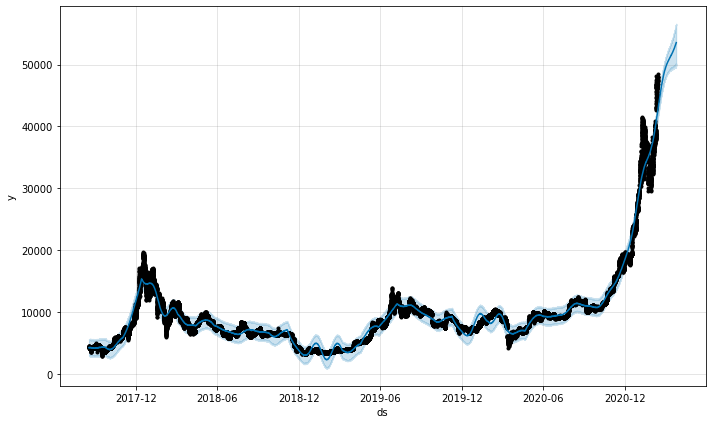

In [31]:
# Plot the Prophet predictions for the forecast_trends data
model.plot(forecast_trends);

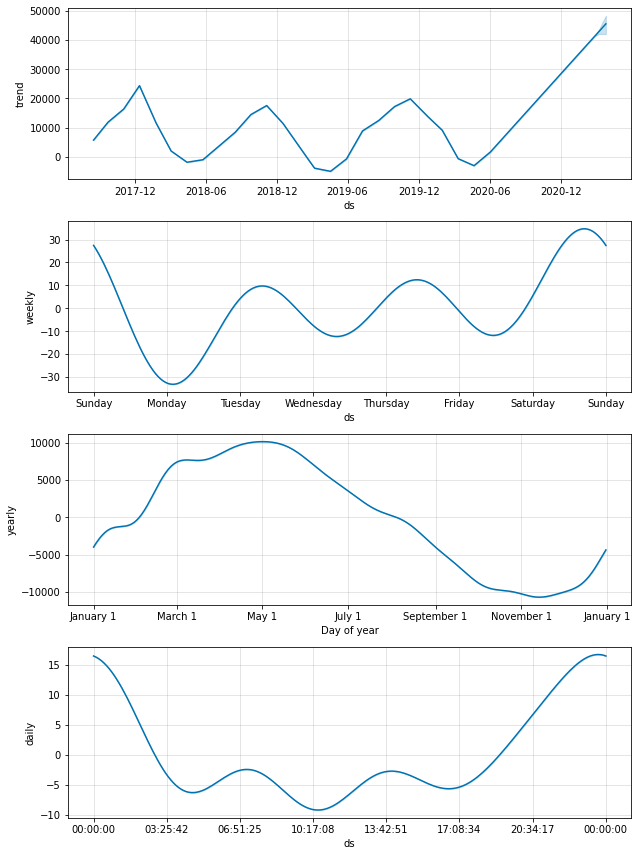

In [32]:
# Use the plot_components function to visualize the forecast results.
figures = model.plot_components(forecast_trends);

## Part 2: Analyzing Forecast Results

### Set index and Preview DataFrame

In [33]:
# At this point, it's useful to set the `datetime` index of the forecast data.
forecast_trends = forecast_trends.set_index(['ds'])
forecast_trends.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2017-08-17 05:00:00,5729.007558,2959.861870,5664.877657,5729.007558,5729.007558,-1475.592577,-1475.592577,-1475.592577,-6.079561,-6.079561,...,10.269046,10.269046,10.269046,-1479.782063,-1479.782063,-1479.782063,0.0,0.0,0.0,4253.414981
2017-08-17 06:00:00,5735.944085,3020.528355,5532.564753,5735.944085,5735.944085,-1479.347372,-1479.347372,-1479.347372,-4.069971,-4.069971,...,11.038822,11.038822,11.038822,-1486.316223,-1486.316223,-1486.316223,0.0,0.0,0.0,4256.596712
2017-08-17 07:00:00,5742.880611,2913.429288,5594.341194,5742.880611,5742.880611,-1483.683912,-1483.683912,-1483.683912,-2.476162,-2.476162,...,11.651468,11.651468,11.651468,-1492.859219,-1492.859219,-1492.859219,0.0,0.0,0.0,4259.196699
2017-08-17 08:00:00,5749.817138,2958.836929,5567.770400,5749.817138,5749.817138,-1490.692675,-1490.692675,-1490.692675,-3.379493,-3.379493,...,12.097822,12.097822,12.097822,-1499.411004,-1499.411004,-1499.411004,0.0,0.0,0.0,4259.124463
2017-08-17 09:00:00,5756.753665,3017.884977,5579.387767,5756.753665,5756.753665,-1499.895346,-1499.895346,-1499.895346,-6.294868,-6.294868,...,12.371056,12.371056,12.371056,-1505.971534,-1505.971534,-1505.971534,0.0,0.0,0.0,4256.858318


### Visualize the Upper and Lower ranges of a Forecast 
* `yhat` represents the most likely (average) forecast
* `yhat_lower` and `yhat_upper` represents the worst and best case prediction 
    * (These are based on what are known as 80% confidence intervals).

In [40]:
# From the `forecast_trends` DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 10 days (24*10 = 240) 
forecast_trends[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-240:, :].hvplot()

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

### Narrowing a Forecast to a Specific Date Range

In [38]:
# Produce a forecast for a specific time window

# Create a `forecast_march_2021` Dataframe, which contains just forecasts for that month
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
forecast_march_2021 = forecast_trends.loc['2021-03-01':'2021-03-31'][['yhat_upper', 'yhat_lower', 'yhat']]

# Replace the column names to something less technical sounding
forecast_march_2021 = forecast_march_2021.rename(
    columns={
        'yhat_upper': 'Best Case',
        'yhat_lower':'Worst Case', 
        'yhat':'Most Likely Case'
    }
)

# Review the last five rows of the DataFrame
forecast_march_2021.tail()

,Best Case,Worst Case,Most Likely Case
ds,,,
2021-03-25 17:00:00,56513.505384,50058.431608,53505.047770
2021-03-25 18:00:00,56617.979824,49859.366688,53514.865846
2021-03-25 19:00:00,56425.438465,50099.216429,53526.239570
2021-03-25 20:00:00,56484.420243,49772.392512,53538.274621
2021-03-25 21:00:00,56526.484171,49858.876941,53550.434734


In [39]:
# Display the average forecasted price for March 2021
forecast_march_2021.mean()

Best Case           53465.669437
Worst Case          49104.922128
Most Likely Case    51395.656942
dtype: float64